In [201]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Barabási-Albert

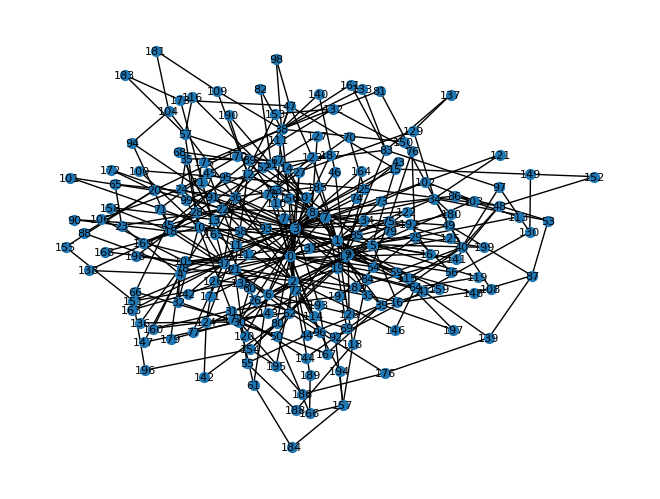

In [10]:
# # Function to create and visualize a Barabási-Albert network
# def create_barabasi_network(num_nodes, num_edges_to_attach, seed=None):
#     G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach, seed=seed)

#     # Visualize the network
#     pos = nx.spring_layout(G)  # Layout algorithm, you can choose another layout if desired
#     nx.draw(G, pos, with_labels=True, node_size=50, font_size=8, font_color='black', cmap=plt.cm.Blues)

#     # Display the plot
#     plt.show()

# # Example: Create a Barabási-Albert network with 100 nodes and attach 2 edges to each new node
# create_barabasi_network(200, 2)



####### THIS CODE CAN VISUALIZE THE NETWORK WITH NUMBER OF NODES BUT I THINK THAT THE NUMBER OF NODES DOES NOT IMPORTANT FOR US.

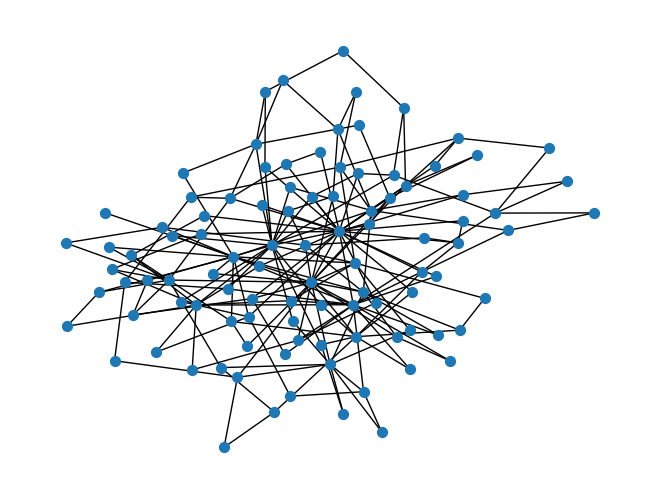

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Function to create and visualize a Barabási-Albert network
def create_barabasi_network(num_nodes, num_edges_to_attach, seed=None):
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach, seed=seed)

    # Visualize the network without node labels
    pos = nx.spring_layout(G)  # Layout algorithm, you can choose another layout if desired
    nx.draw(G, pos, node_size=50, font_size=8, font_color='red', cmap=plt.cm.Blues)

    # Display the plot
    plt.show()
    # Return the generated network
    return G

# Example: Create a Barabási-Albert network with 200 nodes and attach 2 edges to each new node
barabasi_network = create_barabasi_network(100, 2)

# It follows Power-Law

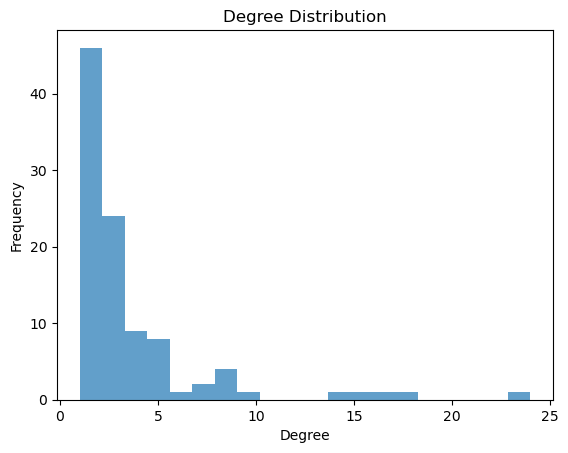

In [3]:
# Now, you can use 'barabasi_network' in your subsequent code
# For example, you can plot the degree distribution of the network
def plot_degree_distribution(G):
    degrees = [val for (node, val) in G.degree()]
    plt.hist(degrees, bins=20, alpha=0.7)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Plot the degree distribution of the Barabási-Albert network
plot_degree_distribution(barabasi_network)

# Erdös and Rényi

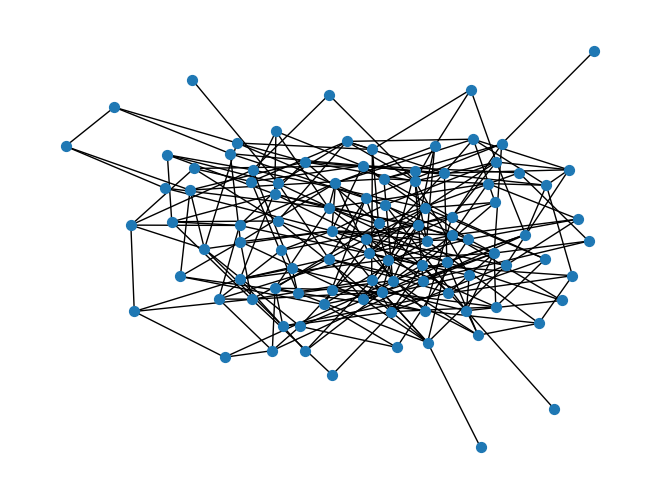

In [8]:
# Function to create and visualize a random network
def create_and_visualize_random_network(num_nodes, avg_degree, seed=None):
    G = nx.erdos_renyi_graph(num_nodes, avg_degree / (num_nodes - 1), seed=seed)

    # Visualize the network without node labels
    pos = nx.spring_layout(G)  # You can choose another layout if desired
    nx.draw(G, pos, node_size=50, font_size=8, font_color='black', cmap=plt.cm.Blues)

    # Display the plot
    plt.show()

    return G

# Example: Create and visualize a random network with 100 nodes and an average degree of 6
random_network = create_and_visualize_random_network(100, 6, seed=42)

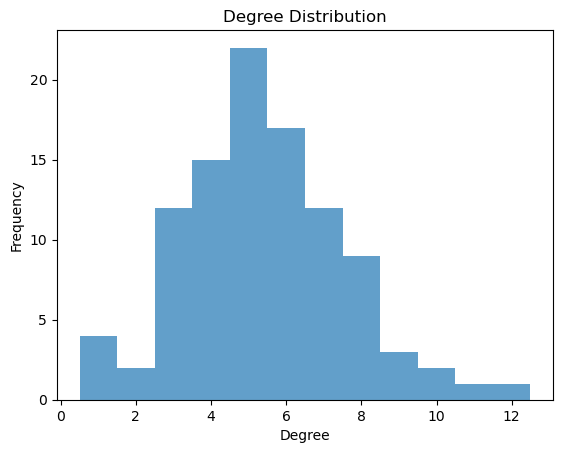

In [9]:
# Function to plot the degree distribution
def plot_degree_distribution(G):
    degrees = [val for (node, val) in G.degree()]
    plt.hist(degrees, bins=np.arange(min(degrees), max(degrees) + 1.5) - 0.5, alpha=0.7)
    plt.title('Degree Distribution')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

    
# Plot the degree distribution of the random network
plot_degree_distribution(random_network)

# SIR Model Simulation


The SIR model is a compartmental model widely used in epidemiology to study the spread of infectious diseases within a population.


The SIR model consists of three differential equations:

\begin{align*}
\frac{dS}{dt} &= -\beta \cdot \frac{S \cdot I}{N} \\
\frac{dI}{dt} &= \beta \cdot \frac{S \cdot I}{N} - \gamma \cdot I \\
\frac{dR}{dt} &= \gamma \cdot I
\end{align*}

where:
\begin{align*}
S &= \text{Number of susceptible individuals} \\
I &= \text{Number of infected individuals} \\
R &= \text{Number of recovered individuals} \\
N &= S + I + R \quad \text{(Total population)} \\
\beta &= \text{Transmission rate (rate of contact between susceptible and infected)} \\
\gamma &= \text{Recovery rate (rate an infected individual recovers)}
\end{align*}


It is important to specify initial conditions for the system, such as the initial number of infected individuals $I_0$ and the initial number of recovered individuals $R_0$. The initial number of susceptible individuals $S_0$ can be calculated as $S_0 = N - I_0 - R_0$.

The SIR model provides insights into the dynamics of infectious diseases and is a valuable tool for understanding and predicting the spread of epidemics.



In [202]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Homogenous Network

# SIR Model for Homogenous Network

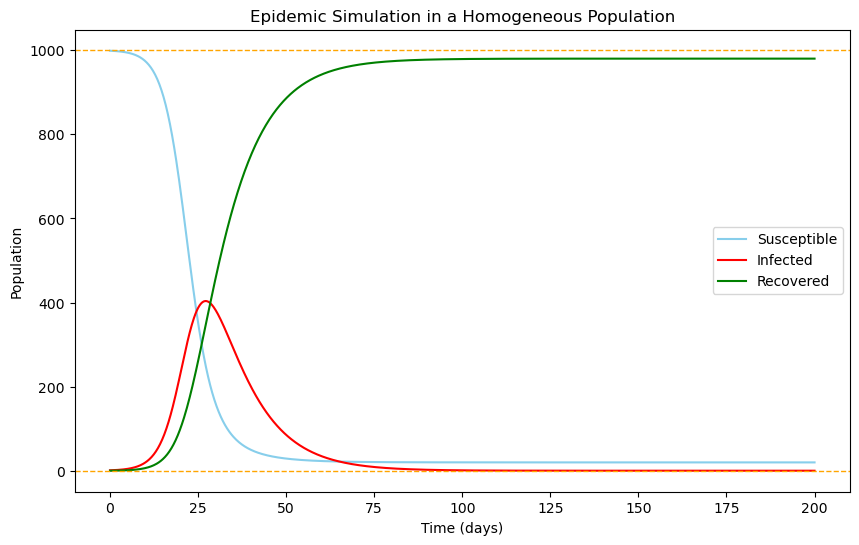

In [203]:
# Parameters
beta = 0.4  # transmission rate
gamma = 0.1  # recovery rate
N = 1000  # total population
I0 = 1  # initial number of infected individuals
S0 = N - I0  # initial number of susceptible individuals
R0 = 0  # initial number of recovered individuals

# Time vector
t = np.linspace(0, 200, 1000)  # adjust the end time as needed

# ODE system
def model(y, t, beta, gamma, N):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
y0 = [S0, I0, R0]

# Integrate the ODEs
result = odeint(model, y0, t, args=(beta, gamma, N))

# Extracting the results
S, I, R = result.T

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible', color='skyblue')
plt.plot(t, I, label='Infected', color='red')
plt.plot(t, R, label='Recovered', color='green')


# Add dashed lines at the top and bottom
plt.axhline(0, linestyle='--', color='orange', linewidth=1)
plt.axhline(N, linestyle='--', color='orange', linewidth=1)


plt.xlabel('Time (days)')
plt.ylabel('Population')
plt.title('Epidemic Simulation in a Homogeneous Population')
plt.legend()
plt.show()

# SIR model for Barabási–Albert Network

### Demonstrating

In [204]:
import networkx as nx
import matplotlib.pyplot as plt

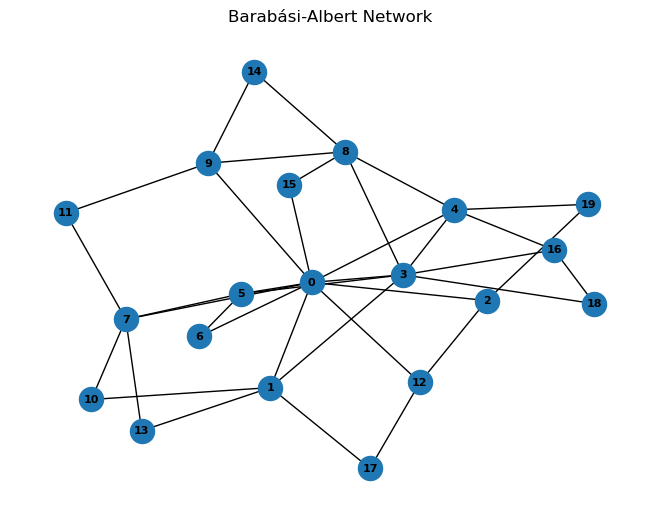

In [205]:
def generate_barabasi_albert_graph(n, m):
    """
    Generate a Barabási-Albert graph.

    Parameters:
    - n: Number of nodes
    - m: Number of edges to attach from a new node to existing nodes

    Returns:
    - Graph object
    """
    G = nx.barabasi_albert_graph(n, m)
    return G

def visualize_graph(graph):
    """
    Visualize the graph.

    Parameters:
    - graph: Graph object
    """
    pos = nx.spring_layout(graph)  # Spring layout for node positioning
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8, font_color="black", font_weight="bold")
    plt.title("Barabási-Albert Network")
    plt.show()

# Example usage
num_nodes = 20
num_edges_to_attach = 2

barabasi_albert_graph = generate_barabasi_albert_graph(num_nodes, num_edges_to_attach)
visualize_graph(barabasi_albert_graph)


# SIR model for Erdös and Rényi Network

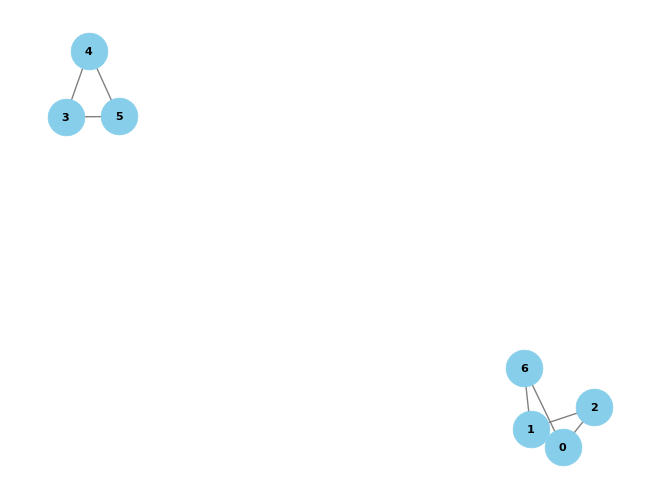

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a homogenous network with a specified degree
def create_homogenous_network(nodes, desired_degree):
    G = nx.Graph()
    
    # Add nodes
    G.add_nodes_from(range(nodes))
    
    # Add edges: Connect each node to the desired degree of other nodes
    for i in range(nodes):
        connected_nodes = set()
        while G.degree(i) < desired_degree:
            j = i
            while j == i or j in connected_nodes:
                j = (j + 1) % nodes  # Ensure no self-loops and no duplicate connections
            G.add_edge(i, j)
            connected_nodes.add(j)
    
    return G

# Visualize the network
def visualize_network(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, font_size=8, font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)
    plt.show()

# Example: Create a homogenous network with 7 nodes and a desired degree of 2
nodes = 7
desired_degree = 2

homogenous_network = create_homogenous_network(nodes, desired_degree)

# Visualize the network
visualize_network(homogenous_network)


# Main Simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from numpy.random import default_rng
import seaborn as sns
import pandas as pd
import itertools

# Model 1 ) Local, prevalence-based spread of the fear of the disease 

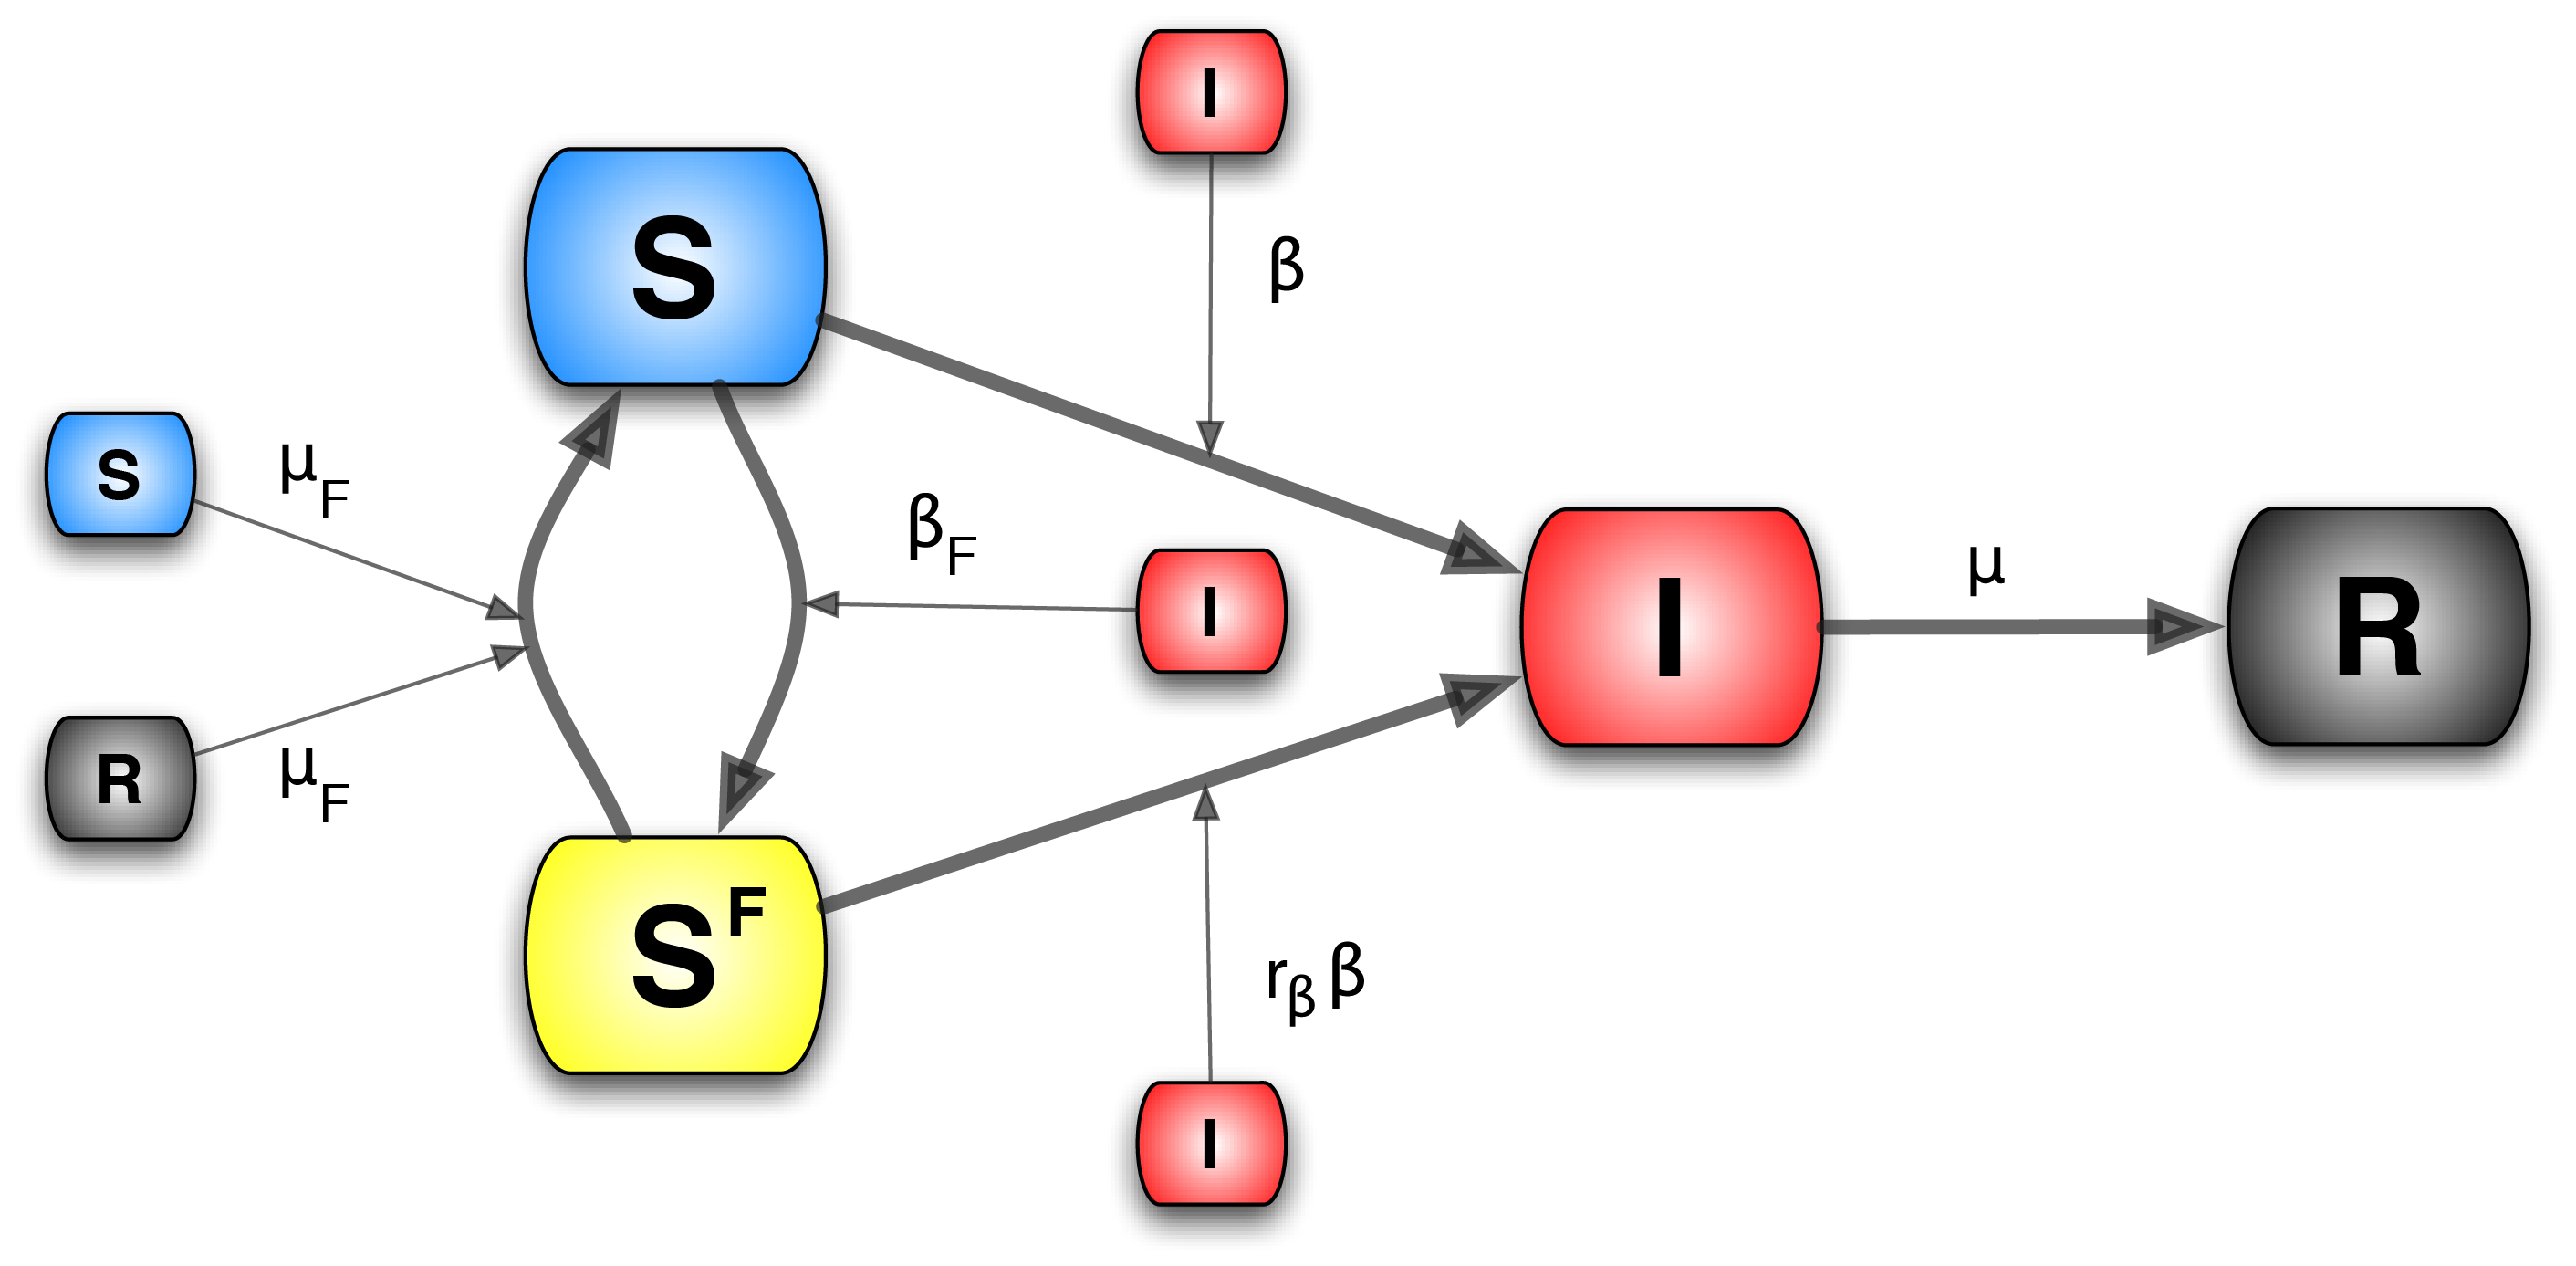

In [24]:
from IPython.display import Image

# Specify the path to your image file
image_path = '1.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


# One example: 

# reference
https://www.sciencedirect.com/science/article/pii/S2352340920314608?via%3Dihub

### I am most afraid of COVID-19 ?
Strongly disagree = 1
Disagree = 2
Neutral = 3
Agree =4
Strongly agree = 5

### I regularly wash my hands for 20 seconds:
Never = 1
Rarely = 2
Sometimes = 3
Often = 4
Always = 5 

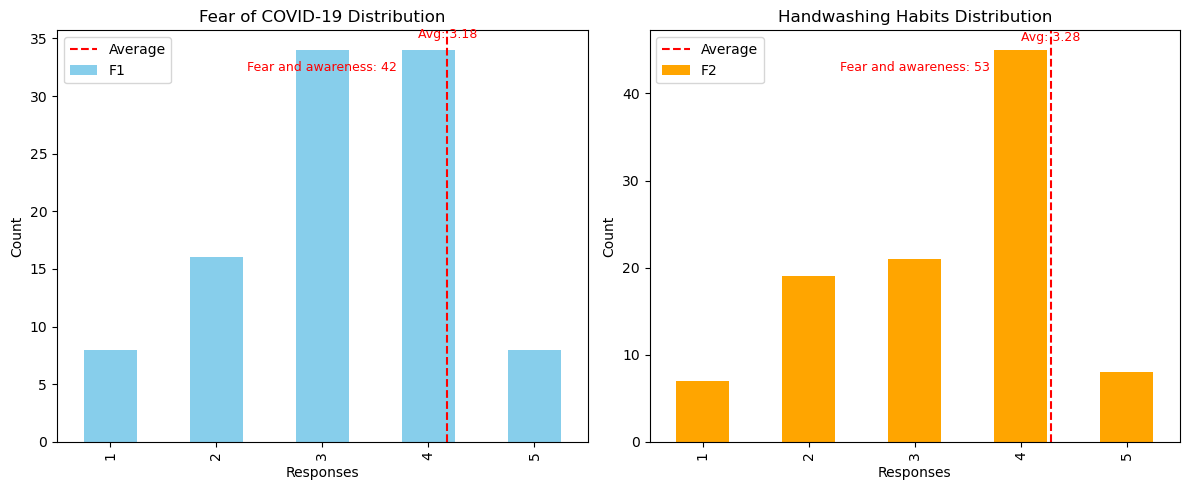

In [47]:


# Specify the file path if the Excel file is not in the same directory as your Jupyter Notebook
# For example: file_path = 'path/to/your/excel/file.xlsx'

# If the Excel file is in the same directory, you can just provide the file name
file_name = 'KPK data set.xlsx'

# Combine the directory path and file name if needed
# If the file is in the same directory, you can skip this step
# full_file_path = file_path + '/' + file_name

# Read the Excel file into a Pandas DataFrame
df = pd.read_excel(file_name)

# Display the DataFrame to verify that the data has been loaded
#df.head()



# Assuming you already have your DataFrame loaded (df)

# Filter the data where 'CI' column is 0 (Yes, I know = 0)
knows_someone_infected = df[df['CI'] == 0]

# Analyze the fear of COVID-19 in this subset
fear_of_covid_count = knows_someone_infected['F1'].value_counts()

# Analyze the handwashing habits in this subset
handwashing_count = knows_someone_infected['F2'].value_counts()

# Calculate the average fear of COVID-19 and handwashing habits in this subset
avg_fear_of_covid = knows_someone_infected['F1'].mean()
avg_handwashing = knows_someone_infected['F2'].mean()

# Count of people with responses greater than 4
count_greater_than_4_fear = knows_someone_infected[knows_someone_infected['F1'] >= 4].shape[0]
count_greater_than_4_handwashing = knows_someone_infected[knows_someone_infected['F2'] >= 4].shape[0]

# Plotting Fear of COVID-19 distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
fear_of_covid_count.sort_index().plot(kind='bar', color='skyblue')
plt.axvline(x=avg_fear_of_covid, color='red', linestyle='--', label='Average')
plt.text(avg_fear_of_covid, max(fear_of_covid_count) + 1, f'Avg: {avg_fear_of_covid:.2f}', color='red', ha='center', fontsize=9)
plt.annotate(f'Fear and awareness: {count_greater_than_4_fear}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=9, color='red')
plt.title('Fear of COVID-19 Distribution')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.legend(loc='upper left')

# Plotting Handwashing habits distribution
plt.subplot(1, 2, 2)
handwashing_count.sort_index().plot(kind='bar', color='orange')
plt.axvline(x=avg_handwashing, color='red', linestyle='--', label='Average')
plt.text(avg_handwashing, max(handwashing_count) + 1, f'Avg: {avg_handwashing:.2f}', color='red', ha='center', fontsize=9)
plt.annotate(f'Fear and awareness: {count_greater_than_4_handwashing}', xy=(0.5, 0.9), xycoords='axes fraction', ha='center', fontsize=9, color='red')
plt.title('Handwashing Habits Distribution')
plt.xlabel('Responses')
plt.ylabel('Count')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [2]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [5]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)
        
        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])
        
        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series



In [6]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

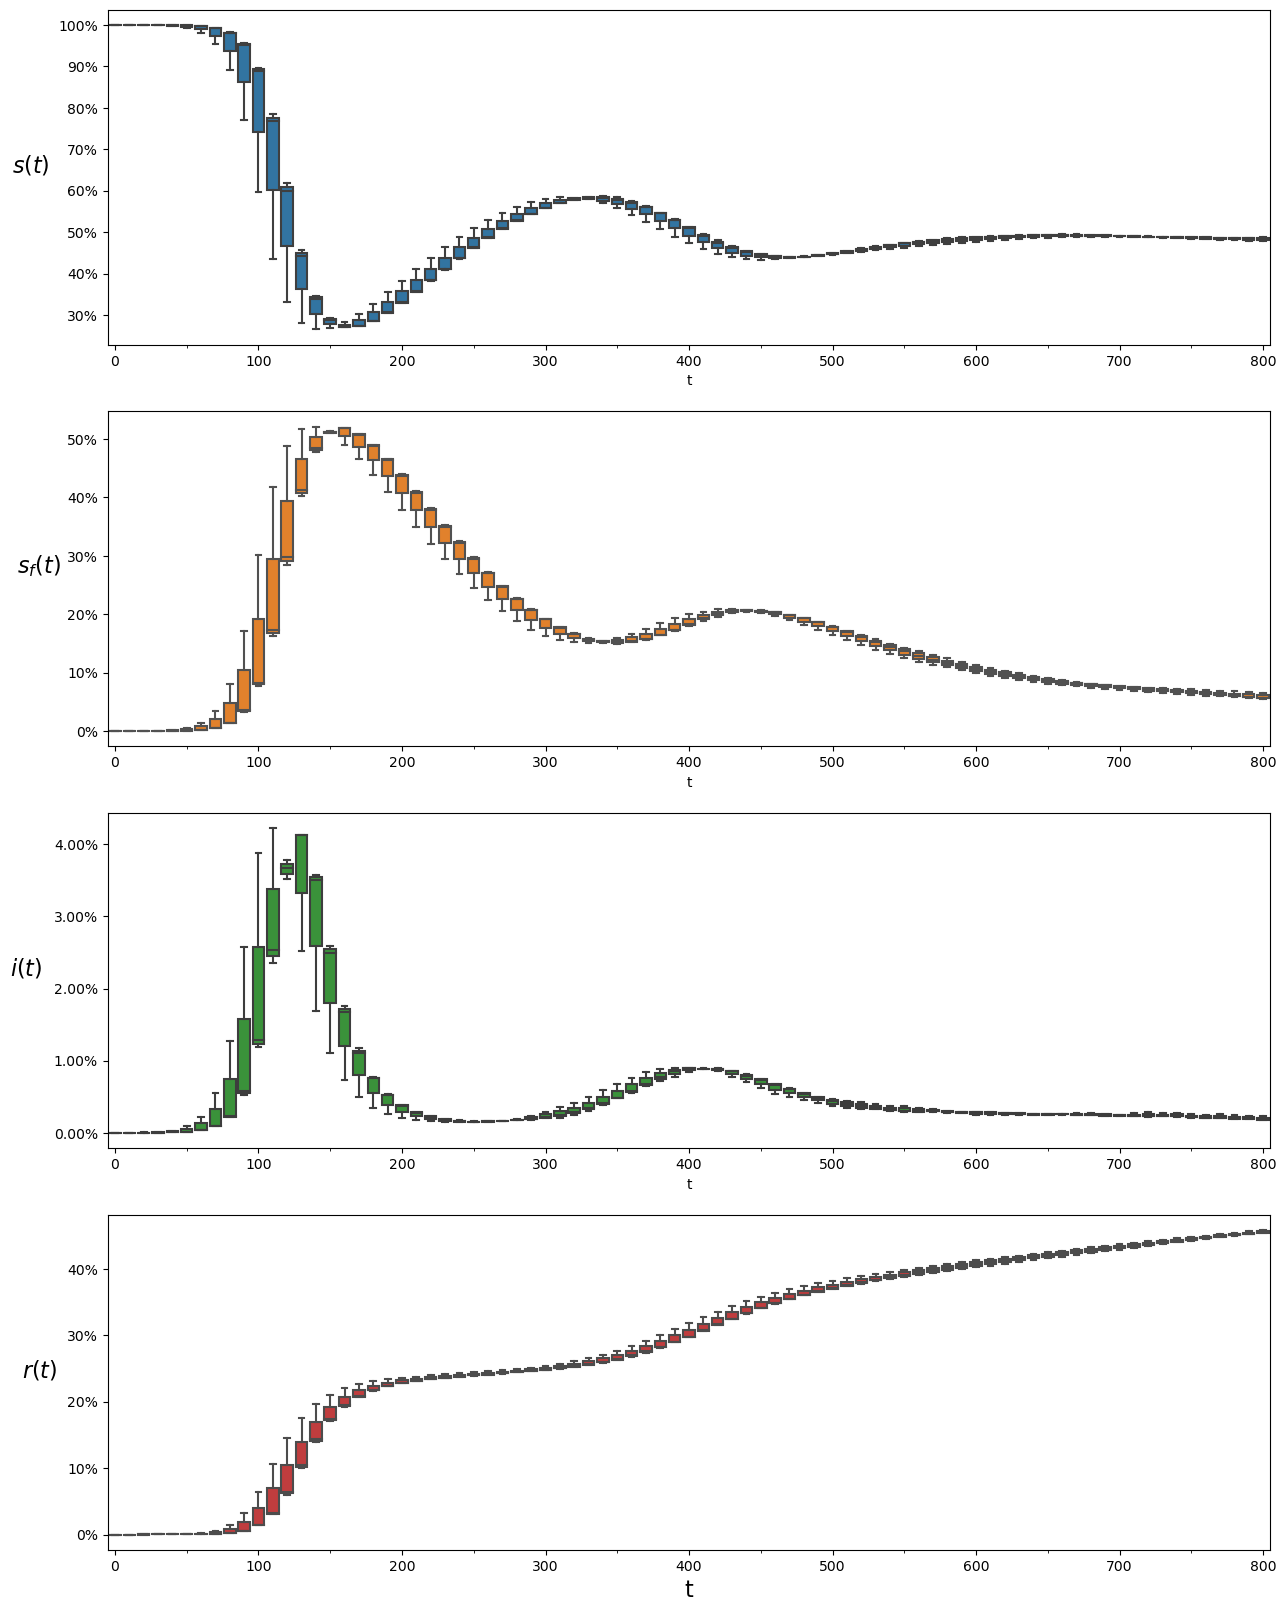

In [7]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

# The role of  $\beta_{\text{f}} $
 $\beta_{\text{f}} $is the transmission rate of the awareness/fear of the disease. This process defines a transition rate for thefear of the disease that can be expressed by the usual mass-action law ~  $\beta_{\text{f}} I(t) / N $
 
 As we expected with increasing the $\beta_{\text{f}} $ the population of the infection people will be decreased.

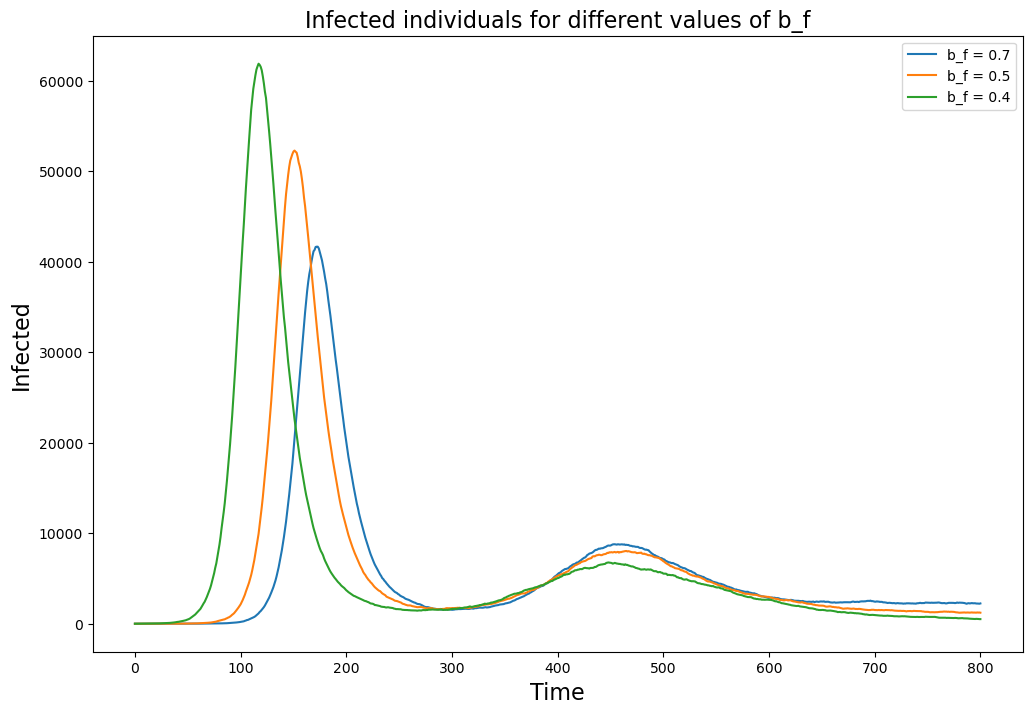

In [87]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, b_f):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
b_f_values = [0.7 , 0.5 ,0.4]

# Plotting
plt.figure(figsize=(12, 8))

for b_f in b_f_values :
    _, time_series = simulate(init, t_max, b_f)
    plt.plot(_, time_series["I"], label=f'b_f = {b_f}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of b_f', fontsize=fontsize)
plt.legend()
plt.show()


# The role of  $r_{\text{b}} $

### This parameter represents the influence of fear on disease transmission. It scales the transmission rate when fear is present.

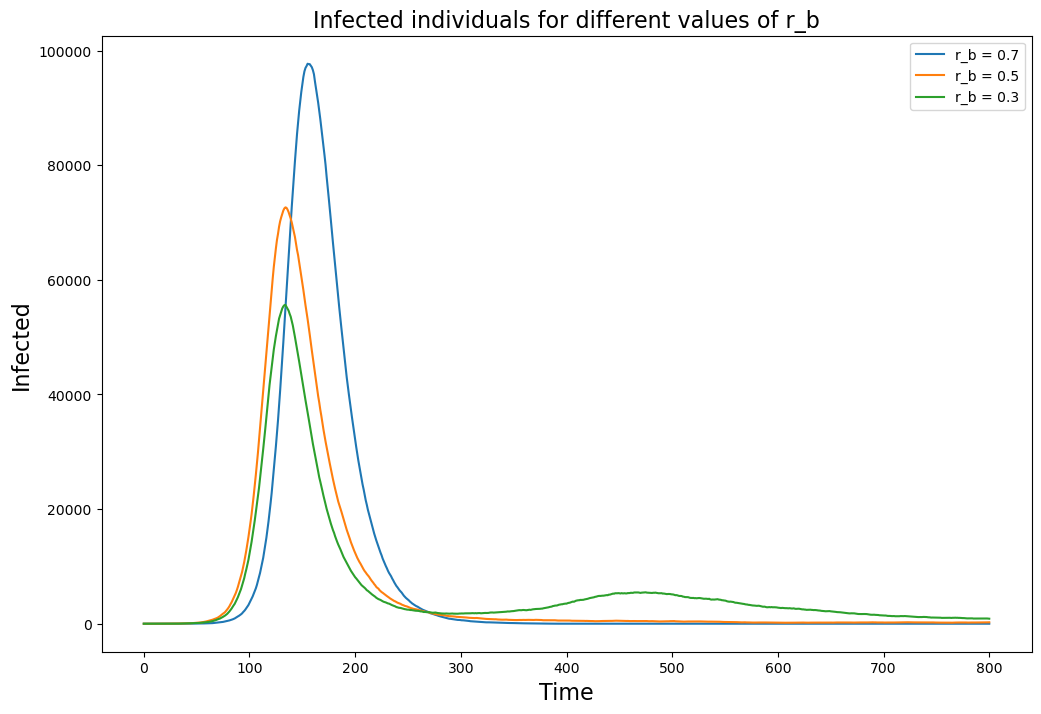

In [30]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.7 , 0.5 ,0.3]

# Plotting
plt.figure(figsize=(12, 8))

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["I"], label=f'r_b = {r_b}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of r_b', fontsize=fontsize)
plt.legend()
plt.show()


## 1. If $ r_{\text{b}} \beta / \mu > 1 $ , then the epidemic size is given by that of an SIR model with $ \beta \to r_{\text{b}} \beta $ 
The statement "Epidemic behaves like SIR with $ \beta \to r_{b} \beta $ means that, in this scenario where fear is not strong enough to halt the epidemic, the model behaves like a standard SIR (Susceptible-Infectious-Recovered) model.

For example in this code we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.25    $

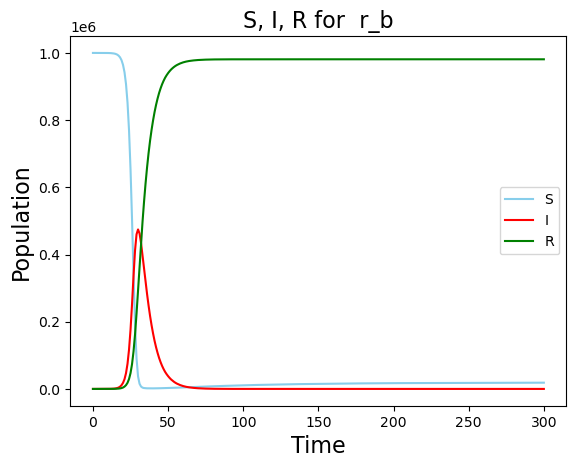

In [31]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.8
mu   = 0.15
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.6]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


### As we can observe, the plot exhibits a striking similarity to the SIR model. However, a little arises as we witness a growing trend in the susceptible population after a certain period. 

### What is causing this phenomenon? The explanation lies in the presence of the term $\mu_f$ introduced in this model, as elaborated in this article. 

$ S_f + S \xrightarrow{\mu_f} S + S \$

$\ S_f + R \xrightarrow{\mu_f} S + R \$

### As the value of $\mu$ increases, indicating a shorter infectious period for the disease, it logically follows that the susceptible individuals in the $S_f$ compartment will transition back to the $S$ compartment, and their fear will diminish. Therefore, under previous conditions where we can elevate $\mu$, we observe a more pronounced upward trend in the susceptible population after a certain time period. let's see:
we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.47    $

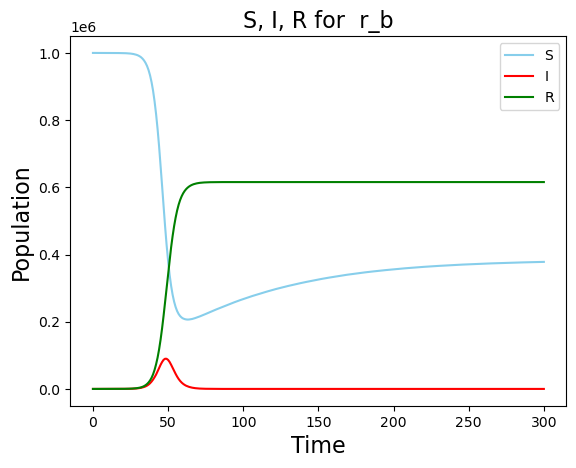

In [32]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.8
mu   = 0.47
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.6]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


## 2. If $ r_{\text{b}} \beta / \mu < 1 $ , then fear completely stops the spreading of the disease. 

### Fear completely stops the spreading of the disease.
For example in this code we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.55    $

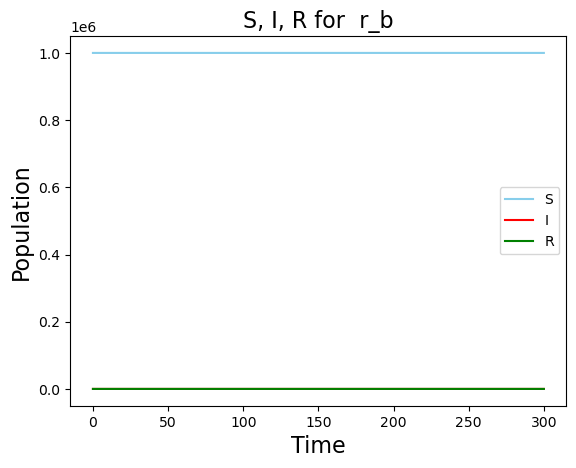

In [33]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 300
I0 = 1

b    = 0.8
mu   = 0.55
b_f  = 0.5
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, r_b):
    compartments = {"S": init["S"],
                    "S_f": init["S_f"],
                    "I": init["I"],
                    "R": init["R"],
                    }

    time_series = {"S": [init["S"]],
                   "S_f": [init["S_f"]],
                   "I": [init["I"]],
                   "R": [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f = rng.binomial(S, b_f*I/N)

        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max + 1)

    return tt, time_series


# Values of r_b to test
r_b_values = [0.6]

for r_b in r_b_values:
    _, time_series = simulate(init, t_max, r_b)
    plt.plot(_, time_series["S"], label='S', color='skyblue')
    plt.plot(_, time_series["I"], label='I', color='red')
    plt.plot(_, time_series["R"], label='R', color='green')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Population', fontsize=fontsize)
plt.title('S, I, R for  r_b', fontsize=fontsize)
plt.legend()
plt.show()


### Fear completely stops the spreading of the disease. (NOT SURE)
For example in this code we assume: $ r_{\text{b}} = 0.6 $ and $ \beta = 0.8 $ and $ \mu=0.75    $

In [34]:
# import matplotlib.pyplot as plt
# N = int(1e6)
# N_sims = 5
# t_max = 300
# I0 = 1

# b    = 0.8
# mu   = 0.75
# b_f  = 0.5
# mu_f = 0.015

# frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

# init = {"S": N - I0,
#         "S_f": 0,
#         "I": I0,
#         "R": 0,
#         }

# step = 10  # for making x-axis less clobbered in plots
# fontsize = 16

# rng = default_rng()


# def simulate(init, t_max, r_b):
#     compartments = {"S": init["S"],
#                     "S_f": init["S_f"],
#                     "I": init["I"],
#                     "R": init["R"],
#                     }

#     time_series = {"S": [init["S"]],
#                    "S_f": [init["S_f"]],
#                    "I": [init["I"]],
#                    "R": [init["R"]],
#                    }

#     for t in range(0, t_max):
#         S, S_f, I, R = list(compartments.values())

#         ##### TRANSMISSION PROCESSES #####
#         # The convention is dABC for a process A + B -> C + B

#         # Disease Transmission for S compartment #
#         # S + I -(b)-> I + I
#         dSII = rng.binomial(S, b*I/N)

#         # Disease Transmission for S_f compartment #
#         # S_f + I -(r_b*b)-> I + I
#         dS_fII = rng.binomial(S_f, r_b*b*I/N)

#         # Fear Transmission #
#         # S + I -(b_f)-> S_f + I
#         dSIS_f = rng.binomial(S, b_f*I/N)

#         # Overcoming the fear after contact with R #
#         # S_f + R -(mu_f)-> S + R
#         dS_fRS = rng.binomial(S_f, mu_f*R/N)
        

#         # Overcoming the fear after contact with S #
#         # S_f + S -(mu_f)-> S + S
#         dS_fSS = rng.binomial(S_f, mu_f*S/N)

#         ##### TRANSITION PROCESSES #####

#         # Healing #
#         # I -(mu)-> R
#         dIR = rng.binomial(I, mu)

#         ##################################################################
#         #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
#         #                     #     #       #       #       #       #    #
#         ##################################################################    
#         compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
#         #                     #     #       #       #       #       #    #
#         #######################     #       #       #       #       #    #
#         compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
#         #                     #     #       #       #       #       #    #
#         #######################     #       #       #       #       #    #
#         compartments["I"]   += +dSII +dS_fII                         -dIR#
#         #                     #     #       #       #       #       #    #
#         #######################     #       #       #       #       #    #
#         compartments["R"]   +=                                       +dIR#
#         #                     #     #       #       #       #       #    #
#         ##################################################################

#         for key in compartments:
#             compartments[key] = np.clip(compartments[key], 0, N)
#             time_series[key].append(compartments[key])

#         tt = np.linspace(0, t_max, t_max + 1)

#     return tt, time_series


# # Values of r_b to test
# r_b_values = [0.6]

# for r_b in r_b_values:
#     _, time_series = simulate(init, t_max, r_b)
#     plt.plot(_, time_series["S"], label='S', color='skyblue')
#     plt.plot(_, time_series["I"], label='I', color='red')
#     plt.plot(_, time_series["R"], label='R', color='green')

# plt.xlabel('Time', fontsize=fontsize)
# plt.ylabel('Population', fontsize=fontsize)
# plt.title('S, I, R for  r_b', fontsize=fontsize)
# plt.legend()
# plt.show()


# Model 2 ) Global, prevalence-based spread of the fear of the disease

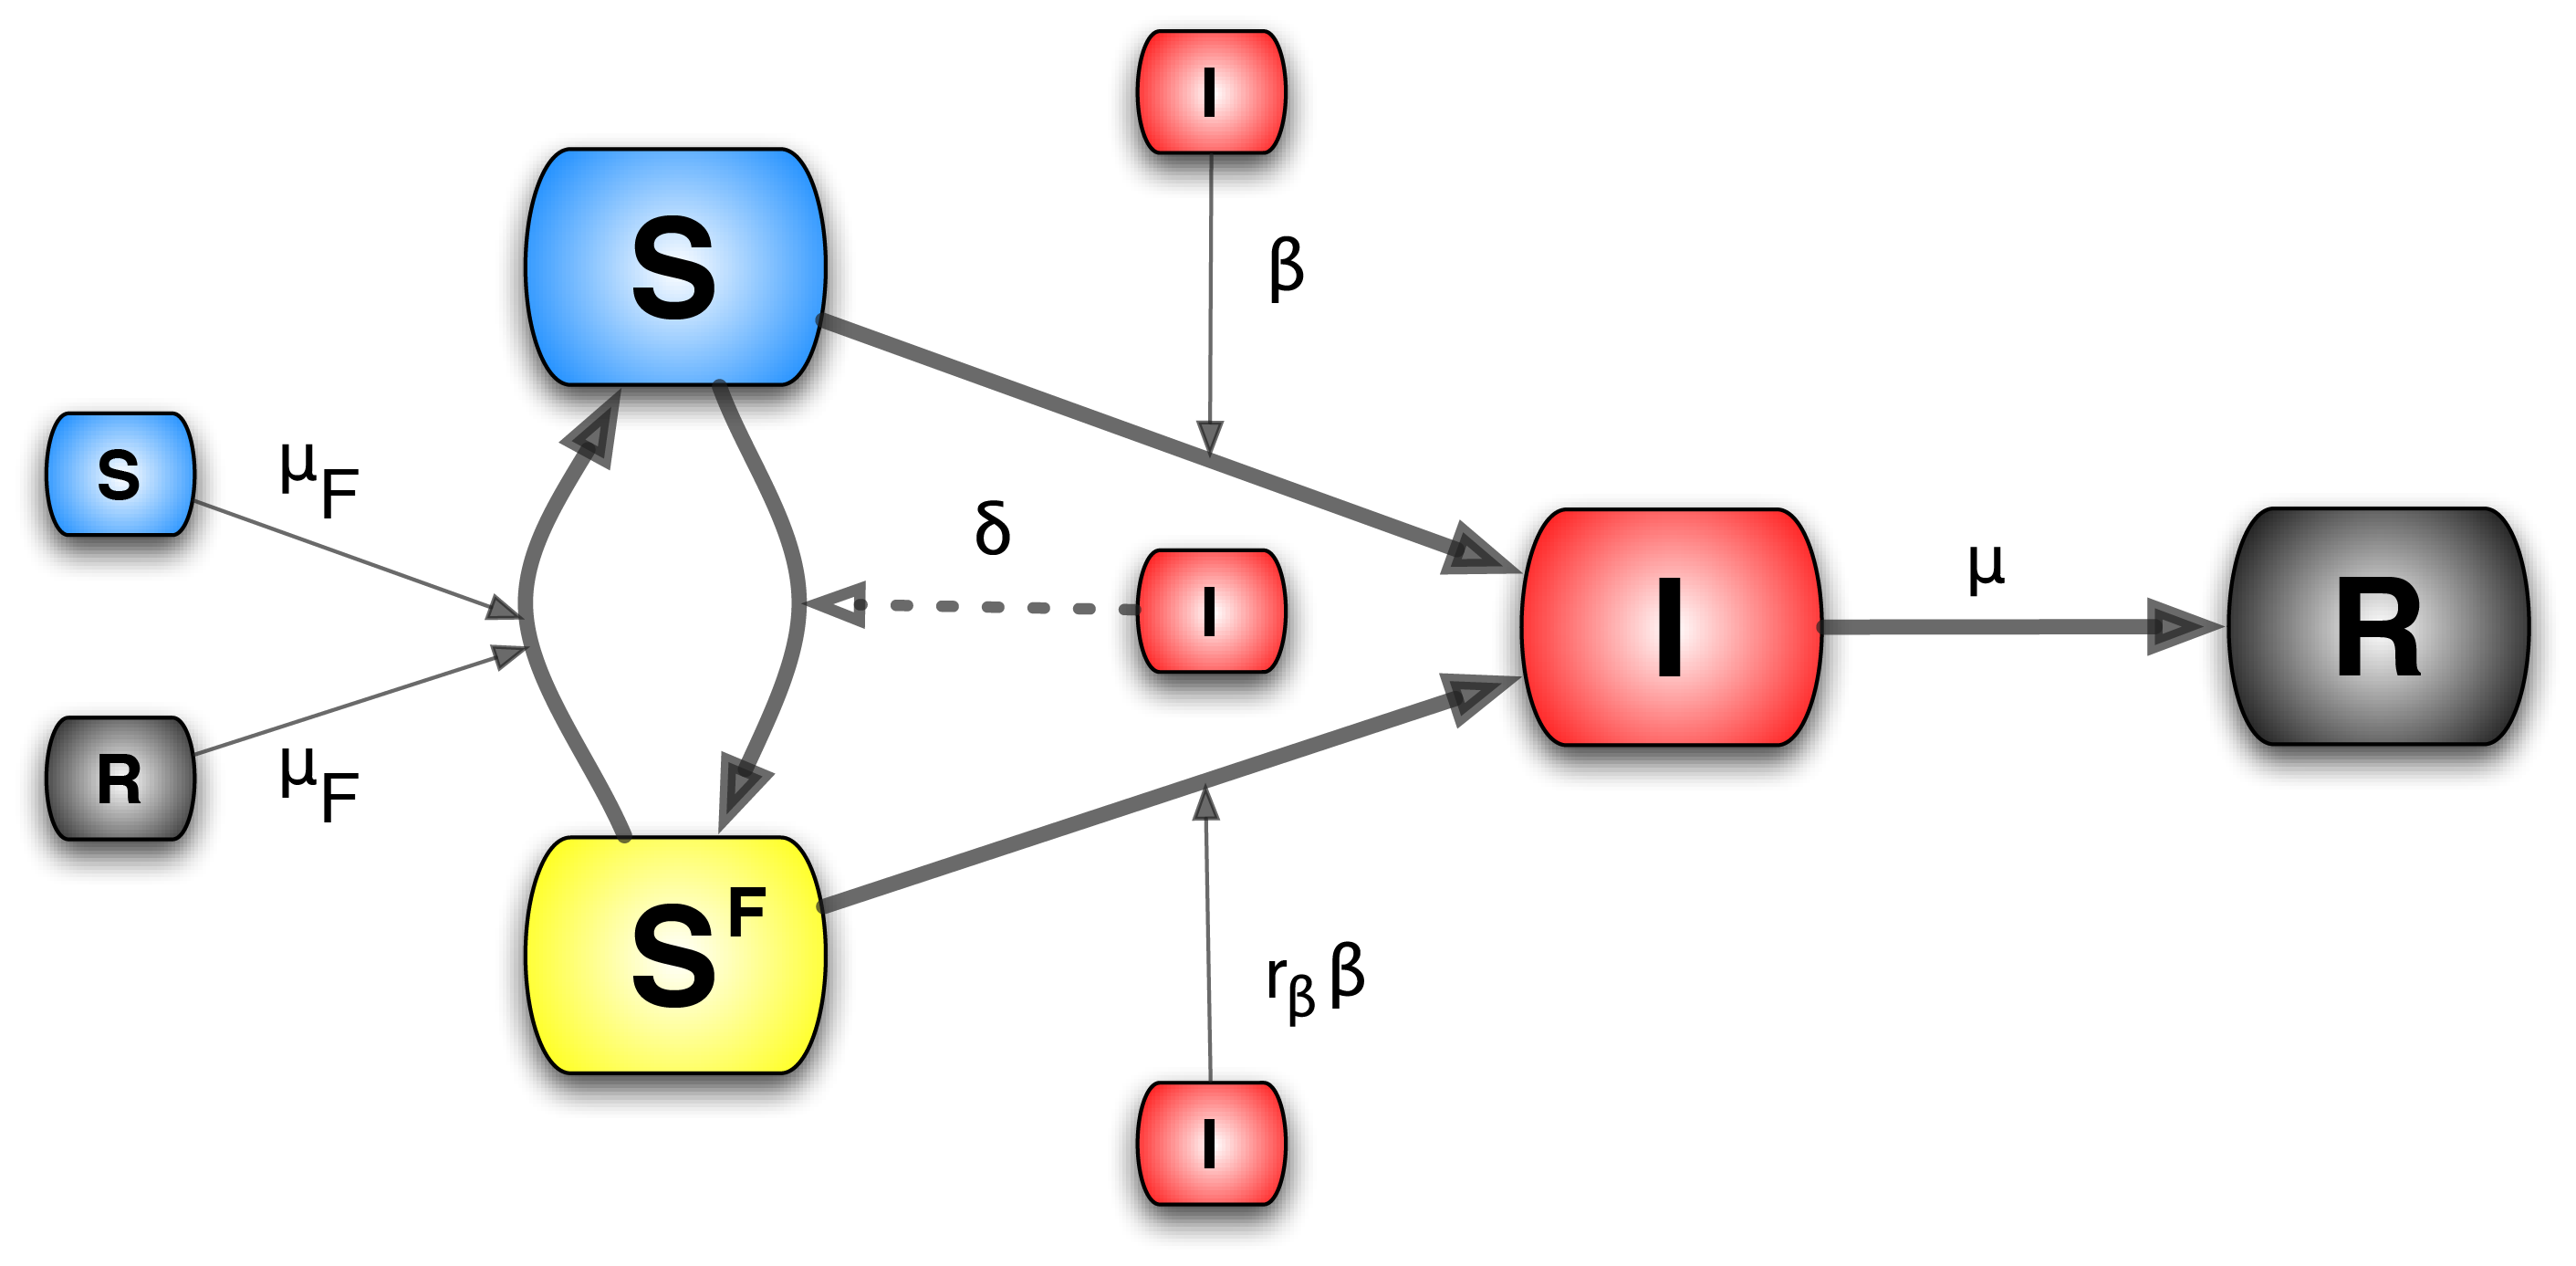

In [35]:
from IPython.display import Image

# Specify the path to your image file
image_path = '2.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


In [36]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
δ = 0.00001
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [37]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # Fear Transmission #
        # S  -(b_f)(1- e^δI(t))-> S_f  
        dSIS_f = rng.binomial(S, b_f*(1 - np.exp(-(δ*I))))


        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series

In [38]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

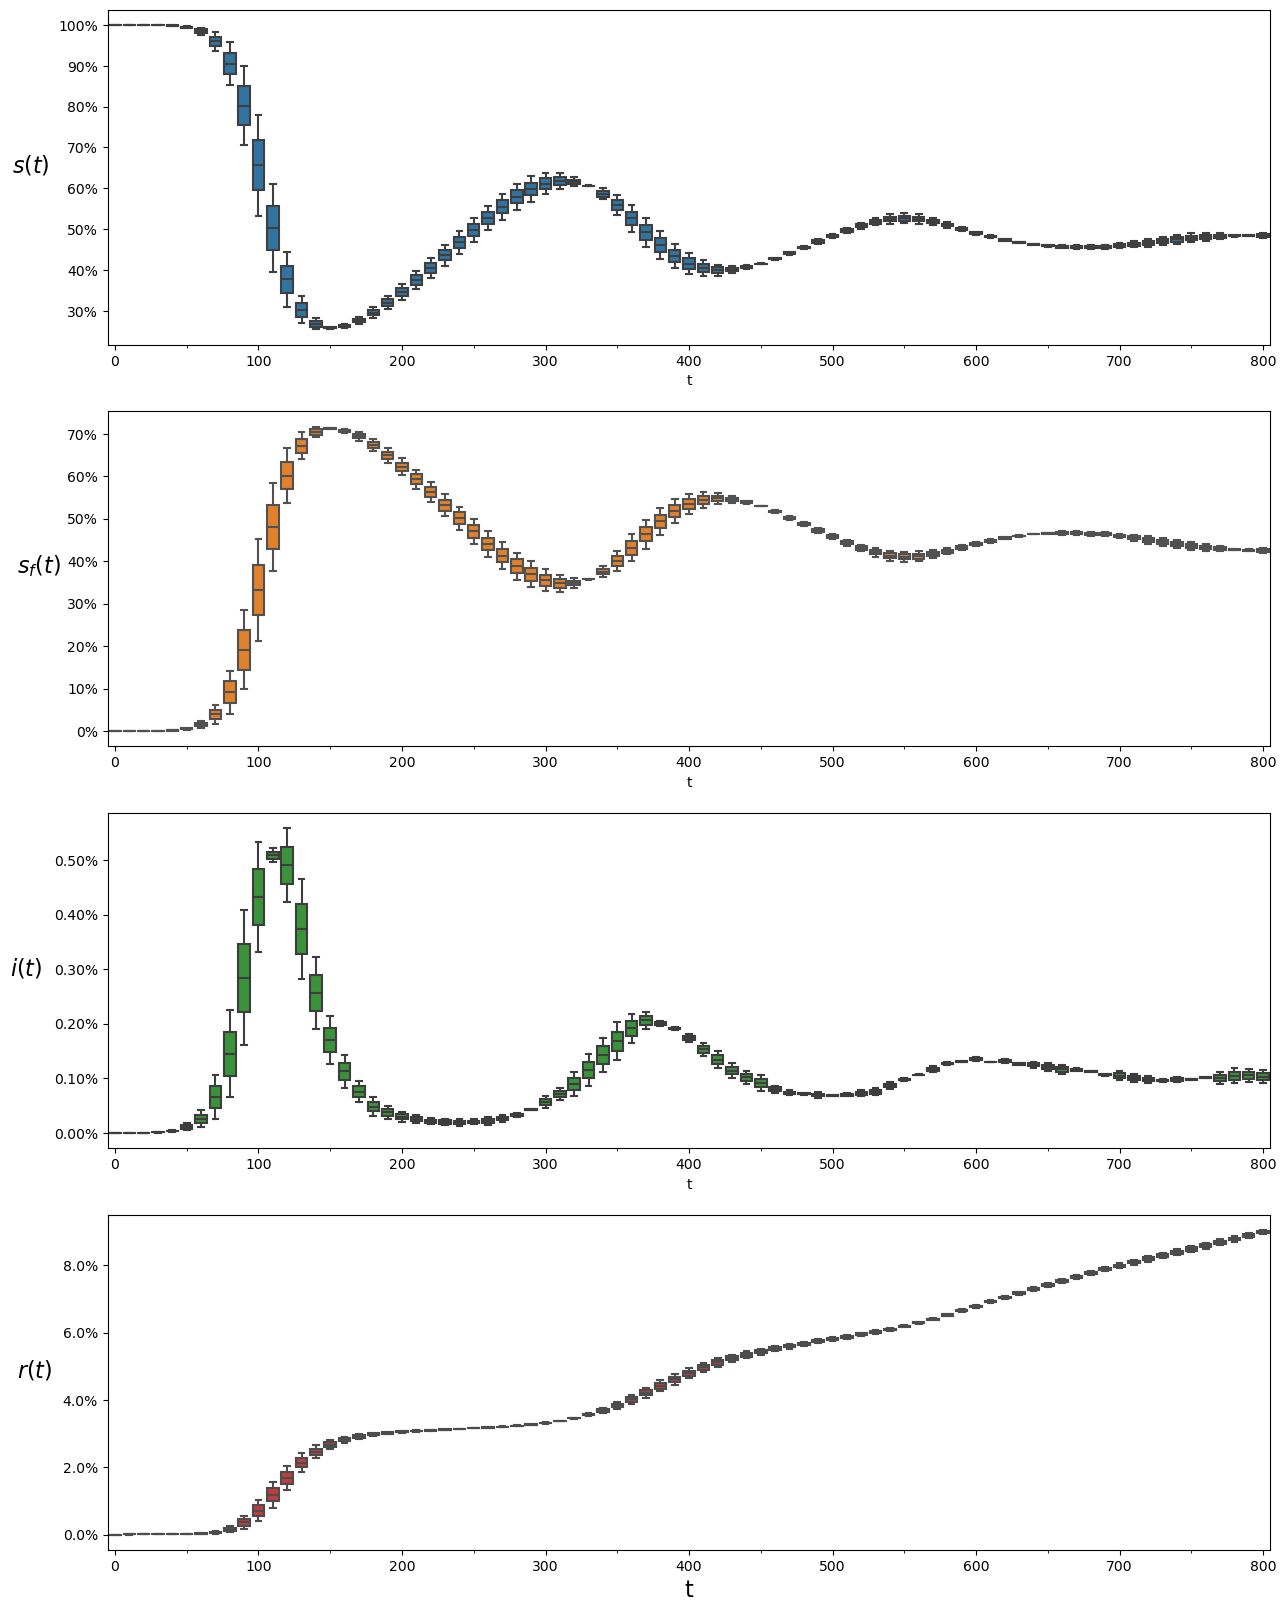

In [39]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

# The role of  δ (*)

### As δ increases the transition into fear becomes faster. Since the people in compartment are more protected from the disease, the epidemic size inevitably decreases.

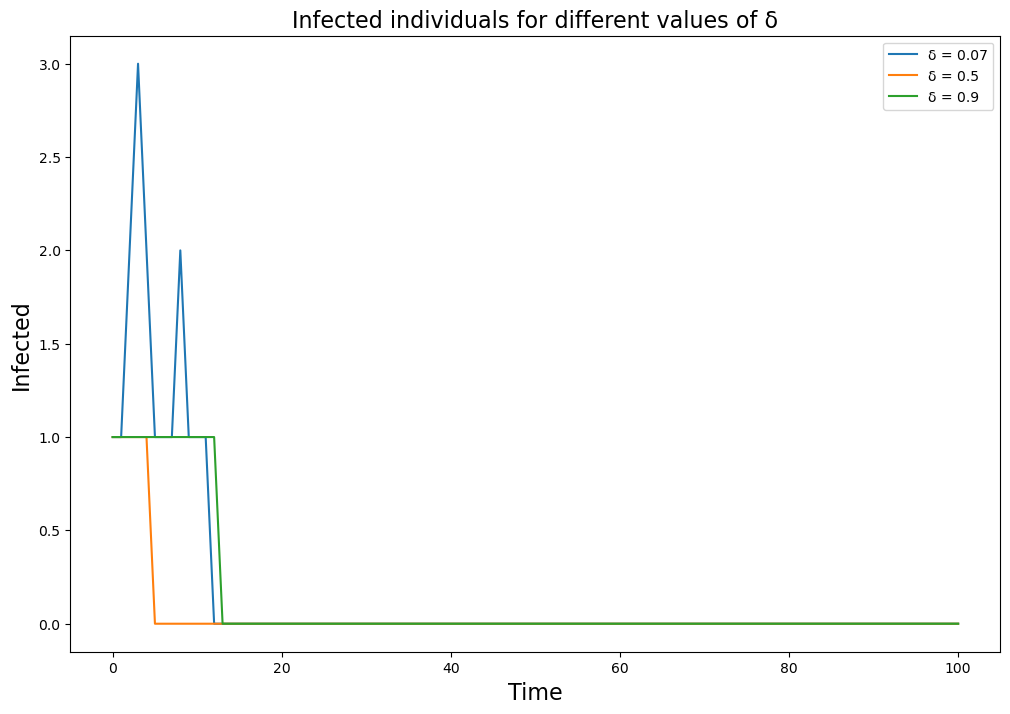

In [40]:
import matplotlib.pyplot as plt
N = int(1e6)
N_sims = 5
t_max = 100
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S": N - I0,
        "S_f": 0,
        "I": I0,
        "R": 0,
        }

step = 10  # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()


def simulate(init, t_max, δ):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # Fear Transmission #
        # S  -(b_f)(1- e^δI(t))-> S_f  
        dSIS_f = rng.binomial(S, b_f*(1 - np.exp(-(δ*I))))


        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series


# Values of r_b to test
δ_values = [0.07 , 0.5 ,0.9]

# Plotting
plt.figure(figsize=(12, 8))

for δ in δ_values :
    _, time_series = simulate(init, t_max, δ)
    plt.plot(_, time_series["I"], label=f'δ = {δ}')

plt.xlabel('Time', fontsize=fontsize)
plt.ylabel('Infected', fontsize=fontsize)
plt.title('Infected individuals for different values of δ', fontsize=fontsize)
plt.legend()
plt.show()


# Model 3) Local, belief-based spread of the fear of the disease 

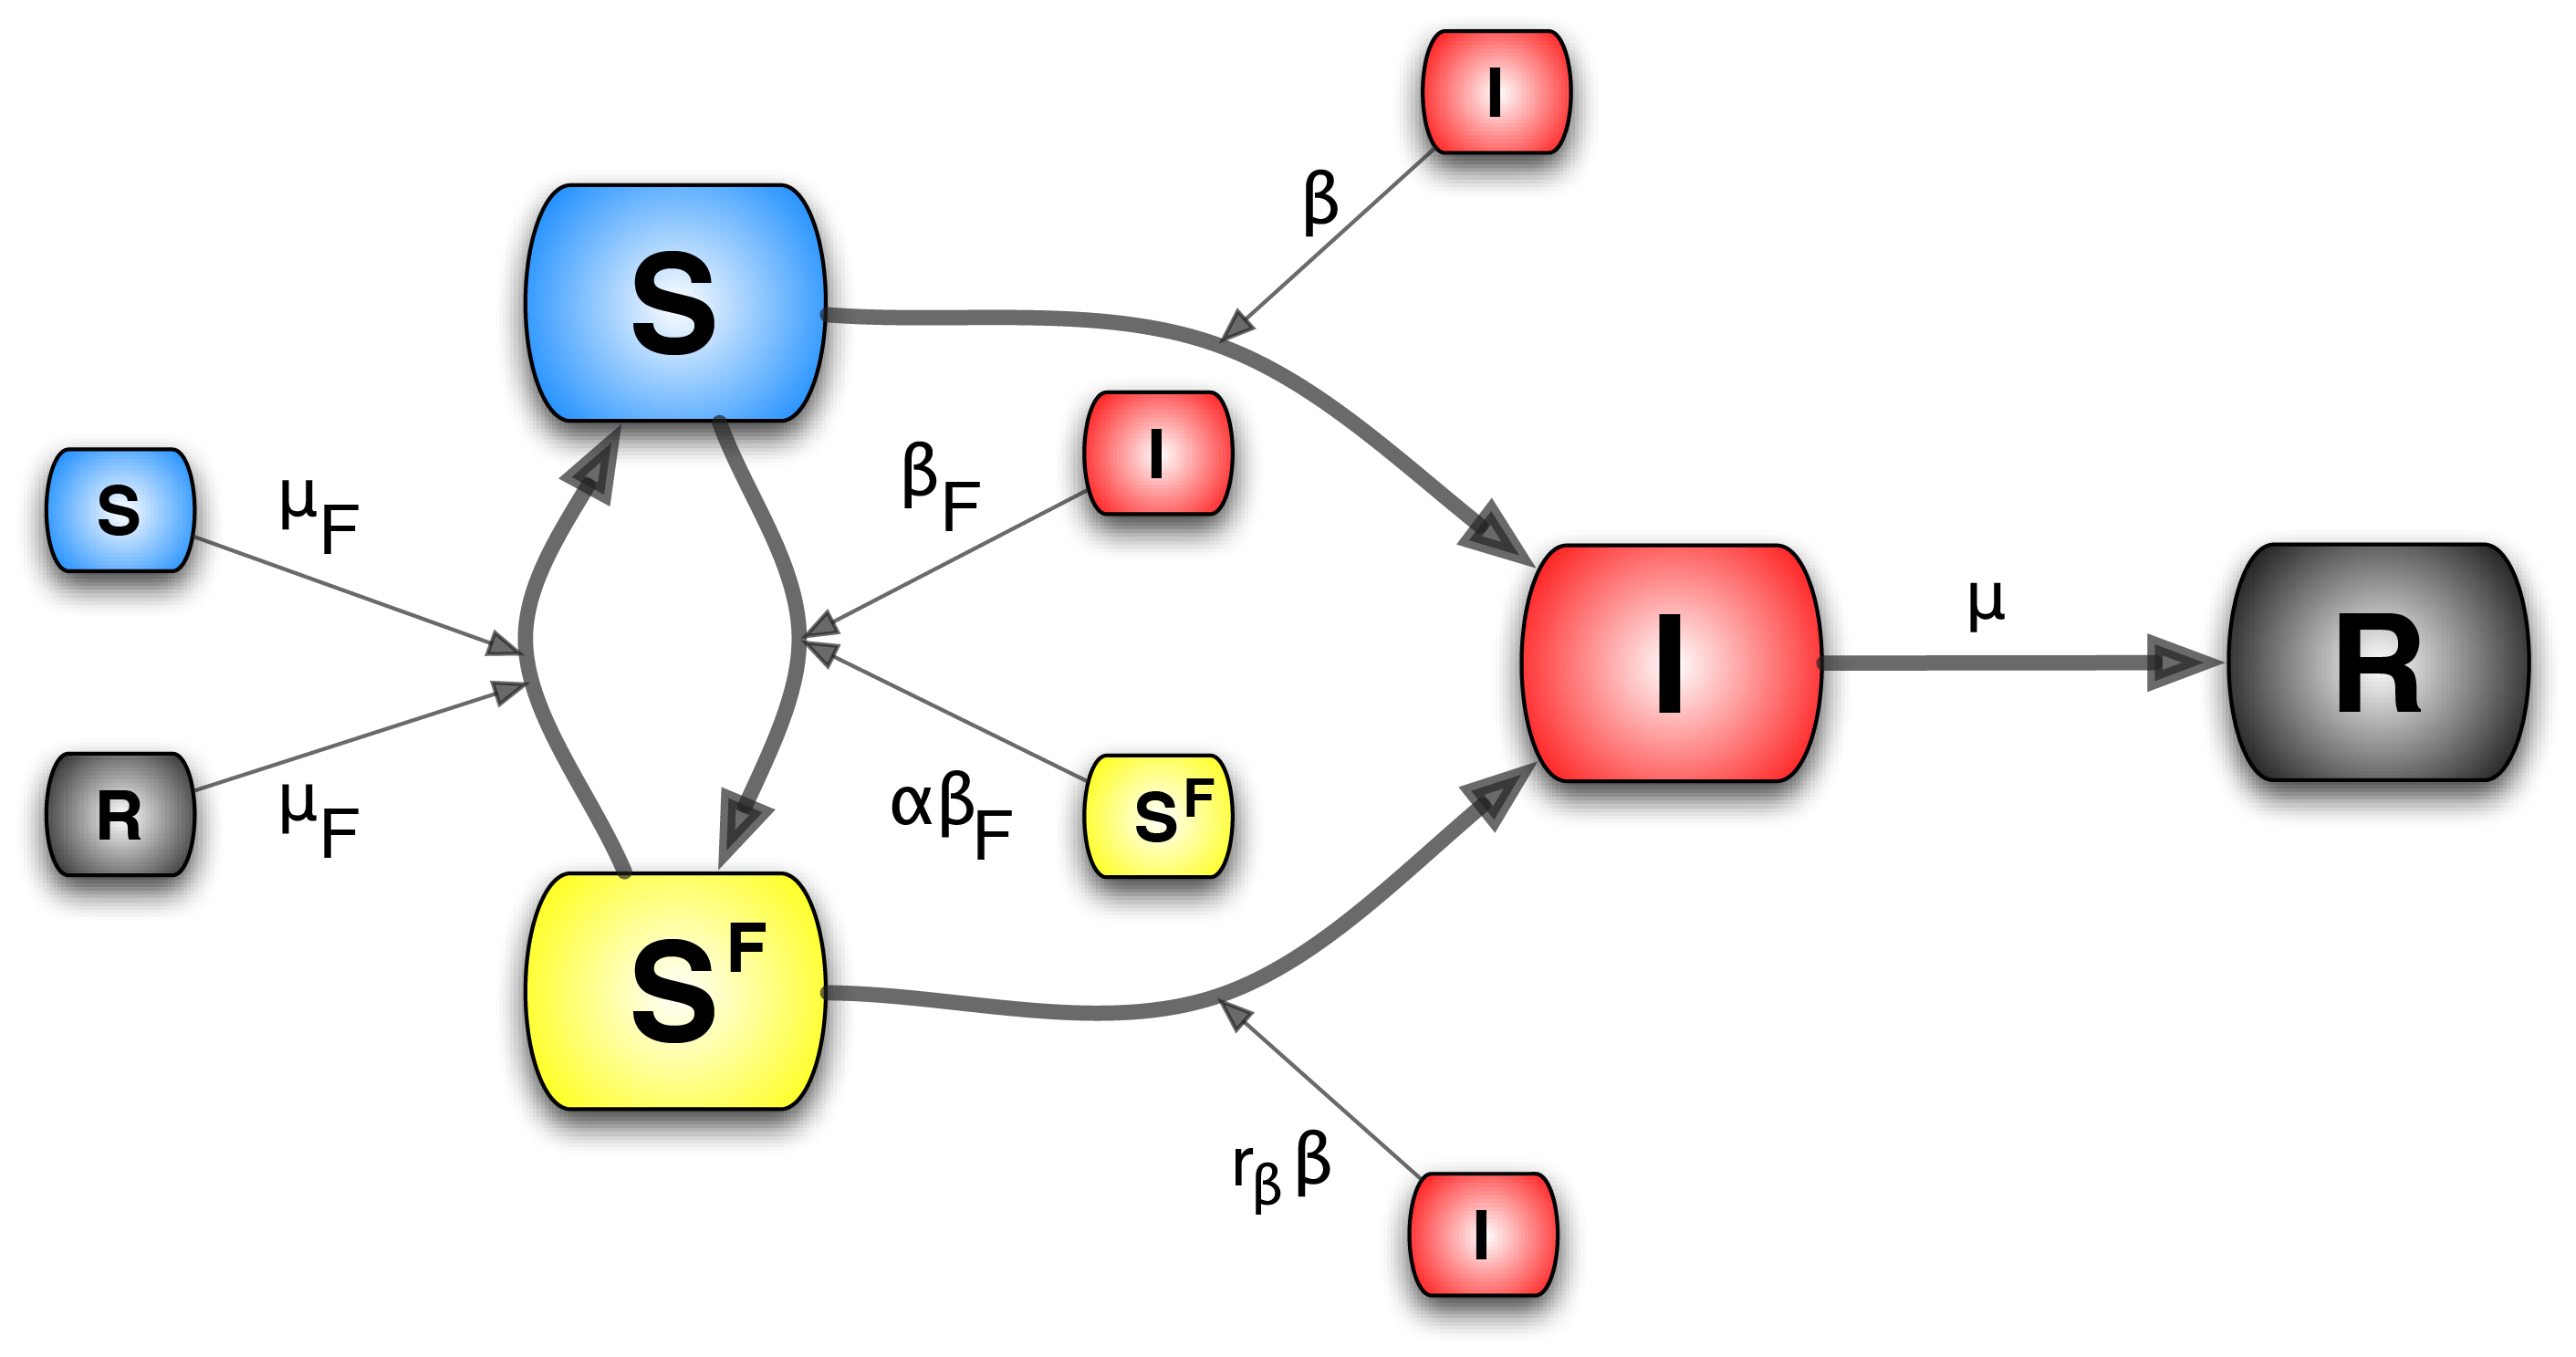

In [41]:
from IPython.display import Image

# Specify the path to your image file
image_path = '3.png'  # Replace with the actual path to your image file

# Display the image
Image(filename=image_path)


In [42]:
N = int(1e6)
N_sims = 5
t_max = 800
I0 = 1

b    = 0.2
mu   = 0.1
r_b  = 0.05
alpha = 0.01
b_f  = 0.7
mu_f = 0.015

frac = 0.001 # only keep runs where the disease reaches more than this fraction of the population

init = {"S"   : N-I0,
        "S_f" : 0,
        "I"   : I0,
        "R"   : 0,
       }

step = 10 # for making x-axis less clobbered in plots
fontsize = 16

rng = default_rng()

In [43]:
def simulate(init, t_max):

    compartments = {"S"  : init["S"],
                    "S_f": init["S_f"],
                    "I"  : init["I"],
                    "R"  : init["R"],
                   }
    
    time_series = {"S"  : [init["S"]],
                   "S_f": [init["S_f"]],
                   "I"  : [init["I"]],
                   "R"  : [init["R"]],
                   }

    for t in range(0, t_max):
        S, S_f, I, R = list(compartments.values())

        ##### TRANSMISSION PROCESSES #####
        # The convention is dABC for a process A + B -> C + B

        # Disease Transmission for S compartment #
        # S + I -(b)-> I + I
        dSII = rng.binomial(S, b*I/N)

        # Disease Transmission for S_f compartment #
        # S_f + I -(r_b*b)-> I + I
        dS_fII = rng.binomial(S_f, r_b*b*I/N)

        # Fear Transmission #
        # Fear Transmission #
        # S + S_f -(b_f)(alpha)-> 2S_f  
        dSIS_f = rng.binomial(S, b_f*(alpha)*S_f/N)
        
        
        # Fear Transmission #
        # S + I -(b_f)-> S_f + I
        dSIS_f2 = rng.binomial(S, b_f*I/N)


        # Overcoming the fear after contact with R #
        # S_f + R -(mu_f)-> S + R
        dS_fRS = rng.binomial(S_f, mu_f*R/N)

        # Overcoming the fear after contact with S #
        # S_f + S -(mu_f)-> S + S
        dS_fSS = rng.binomial(S_f, mu_f*S/N)

        ##### TRANSITION PROCESSES #####

        # Healing #
        # I -(mu)-> R
        dIR = rng.binomial(I, mu)

        ##################################################################
        #                     # dSII# dS_fII# dSIS_f# dS_fRS# dS_fSS# dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################    
        compartments["S"]   += -dSII         -dSIS_f - dSIS_f2 +dS_fRS +dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["S_f"] +=       -dS_fII +dSIS_f +dSIS_f2 -dS_fRS -dS_fSS     #
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["I"]   += +dSII +dS_fII                         -dIR#
        #                     #     #       #       #       #       #    #
        #######################     #       #       #       #       #    #
        compartments["R"]   +=                                       +dIR#
        #                     #     #       #       #       #       #    #
        ##################################################################

        for key in compartments:
            compartments[key] = np.clip(compartments[key], 0, N)
            time_series[key].append(compartments[key])

        tt = np.linspace(0, t_max, t_max+1)
        
    return tt, time_series

In [44]:
s_matrix   = np.zeros((N_sims, t_max+1))
s_f_matrix = np.zeros((N_sims, t_max+1))
i_matrix   = np.zeros((N_sims, t_max+1))
r_matrix   = np.zeros((N_sims, t_max+1))

for i, (row_s, row_s_f, row_i, row_r) in enumerate(zip(s_matrix, s_f_matrix, i_matrix, r_matrix)):
    print("{}/{}".format(i+1, len(i_matrix)), end='\r')
    tt, result = simulate(init, t_max)
    
    if(result["R"][-1] >= frac * N): # Only keep runs where the desease reaches a significant fraction of the pupulation
        row_s[:]   = [elem*100/N for elem in result["S"]]
        row_s_f[:] = [elem*100/N for elem in result["S_f"]]
        row_i[:]   = [elem*100/N for elem in result["I"]]
        row_r[:]   = [elem*100/N for elem in result["R"]]

# remove rows that only contain 0
# those coorespond to runs below the threshold
s_matrix = s_matrix[~np.all(s_matrix == 0, axis=1)]
s_f_matrix = s_f_matrix[~np.all(s_f_matrix == 0, axis=1)]
i_matrix = i_matrix[~np.all(i_matrix == 0, axis=1)]
r_matrix = r_matrix[~np.all(r_matrix == 0, axis=1)]

In [45]:
s_f_matrix 

array([[0.0000e+00, 2.0000e-04, 4.0000e-04, ..., 9.8810e+00, 9.8711e+00,
        9.8521e+00],
       [0.0000e+00, 2.0000e-04, 4.0000e-04, ..., 9.9517e+00, 9.9590e+00,
        9.9515e+00]])

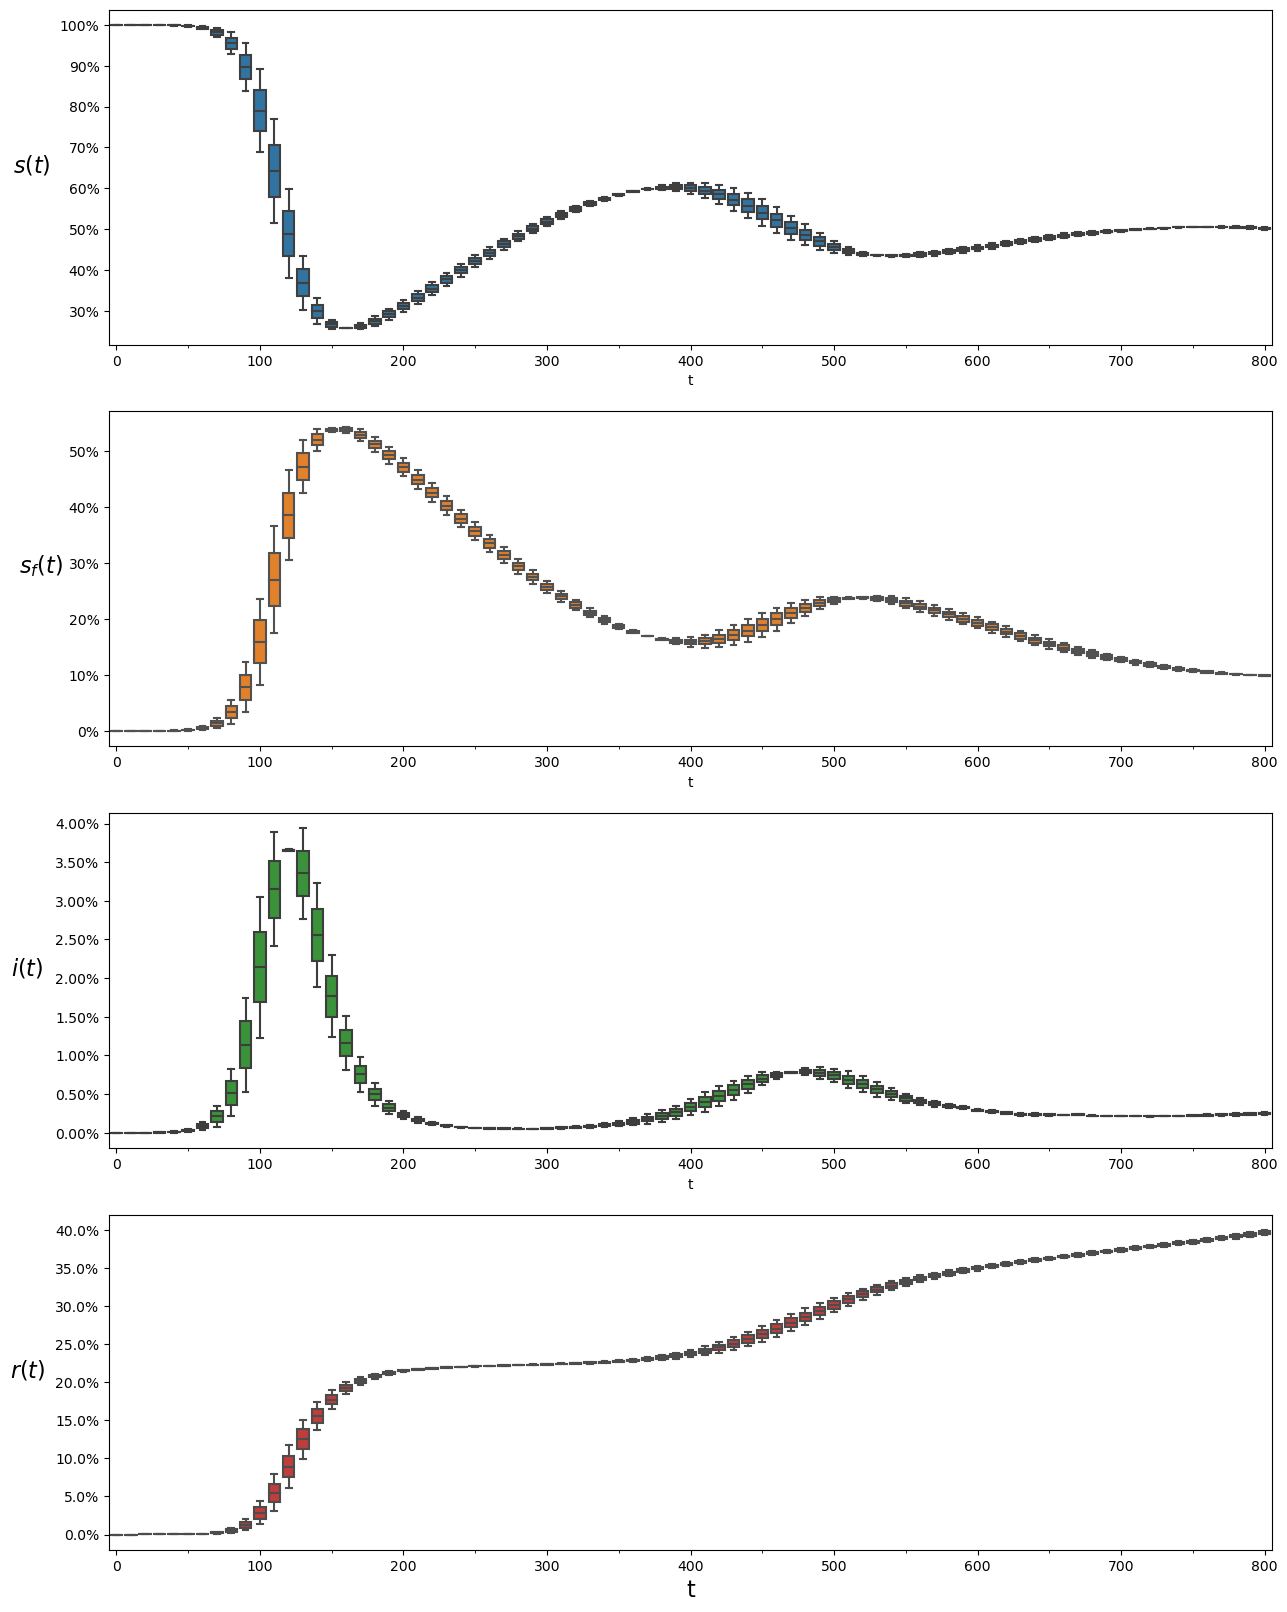

In [46]:
# Visualization

tt = np.linspace(0, t_max, t_max+1)
tt_step = np.array([int(t) for t in tt[::step]])

df_dict = {'t':[],
           's':   [],
           's_f': [],
           'i':   [],
           'r':   [],}

for t in tt_step:
    for (row_s, row_s_f, row_i, row_r) in zip(s_matrix, s_f_matrix, i_matrix, r_matrix):
        df_dict['t'].append(t)
        df_dict['s'].append(row_s[t])
        df_dict['s_f'].append(row_s_f[t])
        df_dict['i'].append(row_i[t])
        df_dict['r'].append(row_r[t])


df = pd.DataFrame(df_dict)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15, 20))

ax4.set_xlabel('$time[days]$', fontsize = fontsize)

boxplot = sns.boxplot(x='t', y='s',   data=df, color="C0", ax=ax1, showfliers = False)
boxplot = sns.boxplot(x='t', y='s_f', data=df, color="C1", ax=ax2, showfliers = False)
boxplot = sns.boxplot(x='t', y='i',   data=df, color="C2", ax=ax3, showfliers = False)
boxplot = sns.boxplot(x='t', y='r',   data=df, color="C3", ax=ax4, showfliers = False)

for ax in (ax1, ax2, ax3, ax4):
    ax.yaxis.set_major_formatter(mtick.PercentFormatter()) #display "%" sign on y axis
    
    ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mtick.MultipleLocator(5))
    
ax1.set_ylabel('$s(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax2.set_ylabel('$s_f(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax3.set_ylabel('$i(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)
ax4.set_ylabel('$r(t)$', fontsize = fontsize, labelpad = 20).set_rotation(0)

plt.show()

# Check the Role of ${\beta}$

Part A) 
The resulting plots provide insights into how different transmission parameters ${\beta}$ impact the evolution of the disease in terms of susceptible individuals, individuals who have overcome fear, infected individuals, and recovered individuals over time.
This code offers a visual representation of the disease dynamics under varying transmission parameters, aiding in the analysis and understanding of the model's behavior.

Part B)